In [28]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt


In [29]:
gt_labels = np.load('/home/local/ASUAD/ywan1053/gcn/MERIT-main/embed/cora/all_gt_labels.npy')
print(gt_labels.shape)
all_embeds = np.load('/home/local/ASUAD/ywan1053/gcn/MERIT-main/embed/cora/all_embs.npy')
print(all_embeds.shape)

(2708,)
(2708, 512)


In [30]:
generated_lables = np.load('/data-drive/backup/changyu/expe/gge/unet_1d_core_all/labels_1400_diffusion_3000_1.8.npy')
print(generated_lables.shape)
generated_embeds = np.load('/data-drive/backup/changyu/expe/gge/unet_1d_core_all/samples_1400_diffusion_3000_1.8.npy')
print(generated_embeds.shape)

(1400,)
(1400, 512)


In [31]:
combined_embeds = np.concatenate((all_embeds, generated_embeds), axis=0)
print(combined_embeds.shape)
combined_labels = np.concatenate((gt_labels, generated_lables), axis=0)
print(combined_labels.shape)

(4108, 512)
(4108,)


In [23]:
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(all_embeds)

/home/local/ASUAD/ywan1053/anaconda3/envs/geo/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/local/ASUAD/ywan1053/anaconda3/envs/geo/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 2708 samples in 0.001s...
[t-SNE] Computed neighbors for 2708 samples in 0.238s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2708
[t-SNE] Computed conditional probabilities for sample 2000 / 2708
[t-SNE] Computed conditional probabilities for sample 2708 / 2708
[t-SNE] Mean sigma: 0.062229
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.172379
[t-SNE] KL divergence after 1000 iterations: 0.855880


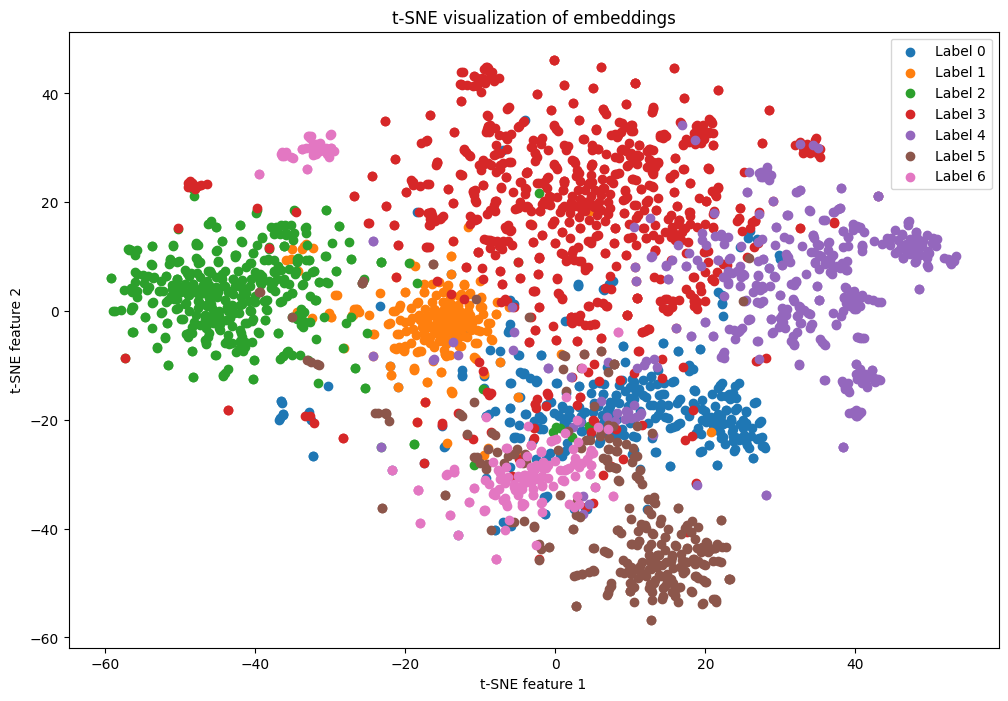

In [24]:
# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot of the reduced data, color by label
for i in range(len(np.unique(gt_labels))):  # Assuming your labels are 0-indexed categories
    plt.scatter(tsne_results[gt_labels == i, 0], tsne_results[gt_labels == i, 1], label=f'Label {i}')

plt.legend()
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE visualization of embeddings')
plt.show()

In [32]:
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(combined_embeds)

/home/local/ASUAD/ywan1053/anaconda3/envs/geo/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/local/ASUAD/ywan1053/anaconda3/envs/geo/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 4108 samples in 0.003s...
[t-SNE] Computed neighbors for 4108 samples in 0.387s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4108
[t-SNE] Computed conditional probabilities for sample 2000 / 4108
[t-SNE] Computed conditional probabilities for sample 3000 / 4108
[t-SNE] Computed conditional probabilities for sample 4000 / 4108
[t-SNE] Computed conditional probabilities for sample 4108 / 4108
[t-SNE] Mean sigma: 0.058239
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.644501
[t-SNE] KL divergence after 1000 iterations: 1.443301


(2708, 2)
(1400, 2)


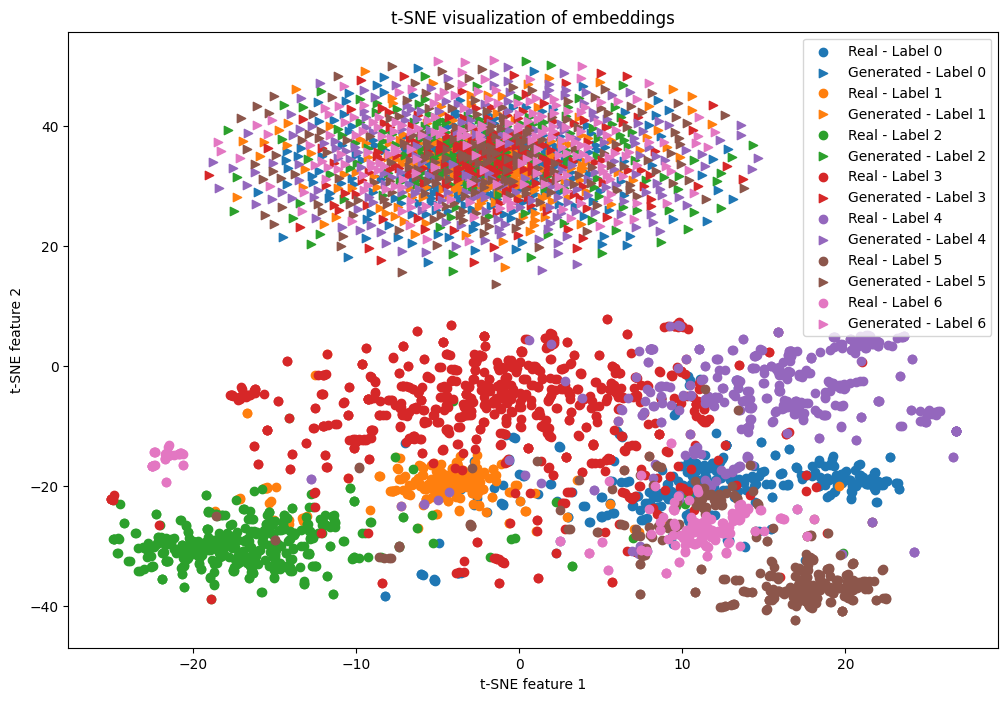

In [46]:
# Plotting
plt.figure(figsize=(12, 8))

n_real = all_embeds.shape[0]

tsne_results_real = tsne_results[:n_real]
print(tsne_results_real.shape)
tsne_results_generated = tsne_results[n_real:]
print(tsne_results_generated.shape)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

unique_labels = np.unique(np.concatenate((gt_labels, generated_lables)))  # Get all unique labels from both sets

for i in unique_labels:  # Iterate through each unique label
    # Plot real data
    plt.scatter(tsne_results_real[gt_labels == i, 0], tsne_results_real[gt_labels == i, 1], 
                color=colors[i % len(colors)], label=f'Real - Label {i}')
    
    # Plot generated data
    plt.scatter(tsne_results_generated[generated_lables == i, 0], tsne_results_generated[generated_lables == i, 1], 
                color=colors[i % len(colors)], label=f'Generated - Label {i}', marker='>')


plt.legend()
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE visualization of embeddings')
plt.show()